# Excercise 1: Autoencoder

We have allready seen a simple MLP model for **MNIST** classification:

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Get the data as Numpy arrays
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Build a simple model
inputs = keras.Input(shape=(28, 28))
l1 = layers.experimental.preprocessing.Rescaling(1.0 / 255)(inputs)
l2 = layers.Flatten()(l1)
l3 = layers.Dense(128, activation="tanh")(l2)
l4 = layers.Dense(128, activation="tanh")(l3)
outputs = layers.Dense(10, activation="softmax")(l4)
model = keras.Model(inputs, outputs)
model.summary()

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

# Train the model for 1 epoch from Numpy data
batch_size = 64
print("Fit on NumPy data")
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=1)

# Train the model for 1 epoch using a dataset
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
print("Fit on Dataset")
history = model.fit(dataset, epochs=1)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
rescaling (Rescaling)        (None, 28, 28)            0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_______________________________________________________

Now we want to change this model and build an **autoencoder** for **MNIST**:

**1. change the network topology:** 
* use 5 dense layers to form "bottleneck" network (see lecture). 
* Layers 1+2 should be the encoder, 3 the lattent layer aner 4+5 the decoder
* remove the softmax (we are not doing a classification anymore)

**2. change the loss-function to compare input and output -> choose a suitable loss from https://keras.io/api/losses/**

**3. train the model**

**4. test the model**
* visualize input and output images to inspect the reconstruction quallity (use MATPLOTLIB *imshow*)
* implement a function to measure the reconstrunction error between in- and output
* change network size (number of neurons per layer) and training paramters to optimize the ressults 

**5. Outlier detection**
* plot a histogram over the the recostruction errors
* find a cutoff value and visualize the outliers

In [2]:
myinputs = keras.Input(shape=(28, 28))
l1 = layers.experimental.preprocessing.Rescaling(1.0 / 255)(myinputs)
l2 = layers.Flatten()(l1)
encode1 = layers.Dense(784, activation='tanh')(l2)
encode2 = layers.Dense(64, activation="tanh")(encode1)
latent = layers.Dense(32, activation="tanh")(encode2)
decode1 = layers.Dense(64, activation="tanh")(latent)
decode2 = layers.Dense(784, activation="tanh")(decode1)
reshape = layers.Reshape([28,28])(decode2)
myoutputs = layers.experimental.preprocessing.Rescaling(255)(reshape)
mymodel = keras.Model(myinputs, myoutputs)
mymodel.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 28, 28)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112

In [0]:
mymodel.compile(optimizer="adam", loss="kullback_leibler_divergence")

In [0]:
batch_size = 64

In [0]:
#x_train = x_train / 255
#x_test = x_test / 255

#x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
#x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [6]:
x_train.shape

(60000, 28, 28)

In [0]:
#dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
#val_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)
#val_dataset

In [10]:
autoencoder = mymodel.fit(x_train, x_train,
                epochs=10,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
938/938 [==============================] - 10s 11ms/step - loss: 13.2609 - val_loss: 13.4022
Epoch 2/10
938/938 [==============================] - 10s 11ms/step - loss: 12.9815 - val_loss: 9.6611
Epoch 3/10
938/938 [==============================] - 15s 16ms/step - loss: 8.9369 - val_loss: 8.5028
Epoch 4/10
938/938 [==============================] - 10s 11ms/step - loss: 8.4288 - val_loss: 8.5028
Epoch 5/10
938/938 [==============================] - 10s 11ms/step - loss: 8.4288 - val_loss: 8.5028
Epoch 6/10
938/938 [==============================] - 11s 12ms/step - loss: 8.4288 - val_loss: 8.5028
Epoch 7/10
938/938 [==============================] - 10s 11ms/step - loss: 8.4288 - val_loss: 8.5028
Epoch 8/10
938/938 [==============================] - 11s 11ms/step - loss: 8.4288 - val_loss: 8.5028
Epoch 9/10
938/938 [==============================] - 10s 11ms/step - loss: 8.4288 - val_loss: 8.5028
Epoch 10/10
938/938 [==============================] - 11s 11ms/step - loss: 8.

In [11]:
print(autoencoder.history)

{'loss': [13.260860443115234, 12.981450080871582, 8.936856269836426, 8.428771018981934, 8.428766250610352, 8.428771018981934, 8.428766250610352, 8.4287748336792, 8.428770065307617, 8.42876148223877], 'val_loss': [13.402237892150879, 9.661105155944824, 8.502842903137207, 8.502842903137207, 8.502842903137207, 8.502842903137207, 8.502842903137207, 8.502842903137207, 8.502842903137207, 8.502842903137207]}


In [12]:
print(x_test.shape)

(10000, 28, 28)


In [13]:
predictions = mymodel.predict(x_test, batch_size=batch_size)
print(predictions.shape)

(10000, 28, 28)


In [0]:
import matplotlib.pyplot as plt

In [0]:
sampleNumber = 30

In [0]:
input_image = x_train[sampleNumber:sampleNumber+1,:].reshape(28,28)

In [0]:
output_image = predictions[sampleNumber:sampleNumber+1,:].reshape(28,28)

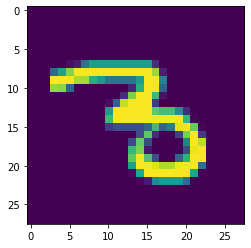

In [18]:
plt.imshow(input_image)

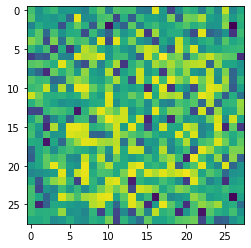

In [21]:
plt.imshow(output_image)

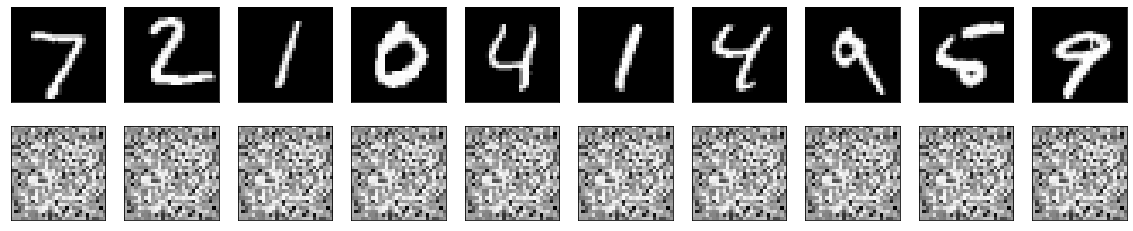

In [22]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()